

* Ana Rebeka de Jesus Coqueiro RM:558374
* Geovanna Souza Ferreira Batista RM:558967






In [ ]:
import pandas as pd

Nós, como analistas de dados da Spotify idealizamos a criação deste dataset com a finalidade de apresentar uma prévia para os stakeholders de como funcionará a retrospectiva anual das músicas mais escutados pelos nossos usuários (Wrapped). Para chegarmos as conclusões dos dados apresentados no dataset, utilizamos como base o mês de abril de 2022, obtidos atráves do Kaglle.

TOP 100 DO SPOTIFY DE ABRIL DE 2022

In [ ]:
spotify = pd.read_csv('/content/top100.csv')
spotify.head()

,rank,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,explicit
0,1,Shape of You,Ed Sheeran,pop,2017,2017‑09‑10,96,65,83,-3,9.0,93.0,234.0,58.0,8.0,84.0,0
1,2,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,2020‑06‑16,171,73,51,-6,9.0,33.0,200.0,0.0,6.0,89.0,0
2,3,Dance Monkey,Tones And I,australian pop,2019,2020‑02‑12,98,59,82,-6,15.0,51.0,209.0,69.0,9.0,77.0,0
3,4,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,2018‑02‑04,160,52,59,-6,13.0,13.0,218.0,12.0,7.0,82.0,1
4,5,Someone You Loved,Lewis Capaldi,pop,2019,2020‑02‑12,110,41,50,-6,11.0,45.0,182.0,75.0,3.0,84.0,0


# DESCRIÇÃO DE CADA COLUNA:
* rank: Posição da música em um ranking, onde 1 é a mais alta.

* title: Título da música.

* artist: Nome do artista que interpreta a música.

* top genre: Gênero musical mais associado à música.

* year: Ano de lançamento da música.

* added: Data em que a música foi adicionada a uma playlist ou banco de dados.

* bpm: Batidas por minuto (BPM), que indica a velocidade da música.

* nrgy: Nível de energia da música, geralmente em uma escala de 0 a 100.

* dnce: Nível de dançabilidade da música, também em uma escala de 0 a 100.

* dB: Nível de volume em decibéis (dB).

* live: Indica a presença de elementos ao vivo na música, em uma escala de 0 a 100.

* val: Valência, que mede a positividade da música em uma escala de 0 a 100.

* dur: Duração da música em segundos.

* acous: Nível de acústica, indicando quanto da música é acústica em relação a elétrica, em uma escala de 0 a 100.

* spch: Proporção de fala na música, indicando quanto da música contém vocal falado.

* pop: Popularidade da música, geralmente em uma escala de 0 a 100.

* explicit: Indica se a música contém conteúdo explícito (1 para sim, 0 para não).

Limpeza e Pré-processamento

In [ ]:
spotify.isnull().sum()


,0
rank,0
title,0
artist,0
top genre,8
year,0
added,0
bpm,0
nrgy,0
dnce,0
dB,0


In [ ]:
spotify.dropna(inplace=True)


In [ ]:
#Tratamento de Dados Ausentes
spotify.fillna(method='ffill', inplace=True)

<ipython-input-7-b8cf1a3e2446>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spotify.fillna(method='ffill', inplace=True)  # Preencher dados ausentes


In [ ]:
spotify.drop_duplicates(inplace=True)  # Remover duplicatas

In [ ]:
spotify.describe(include='all').head()

,rank,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,explicit
count,100.0,100,100,100,100.00,100,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
unique,NaN,100,71,38,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Shape of You,Post Malone,dance pop,NaN,2017‑09‑10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,6,21,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50.5,NaN,NaN,NaN,2016.94,NaN,118.85,62.29,65.87,-6.15,16.78,49.66,208.52,25.21,9.72,74.72,0.33


Análise Exploratória de Dados

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Filtrar as 10 músicas com a melhor classificação
top_songs = spotify.nsmallest(10, 'rank')[['title', 'artist', 'rank']]

In [ ]:
top_songs['Label'] = top_songs['title'] + ' - ' + top_songs['artist']


TOP 10 MÚSICAS QUE FORAM MAIS ESCUTADAS EM ABRIL DE 2022.



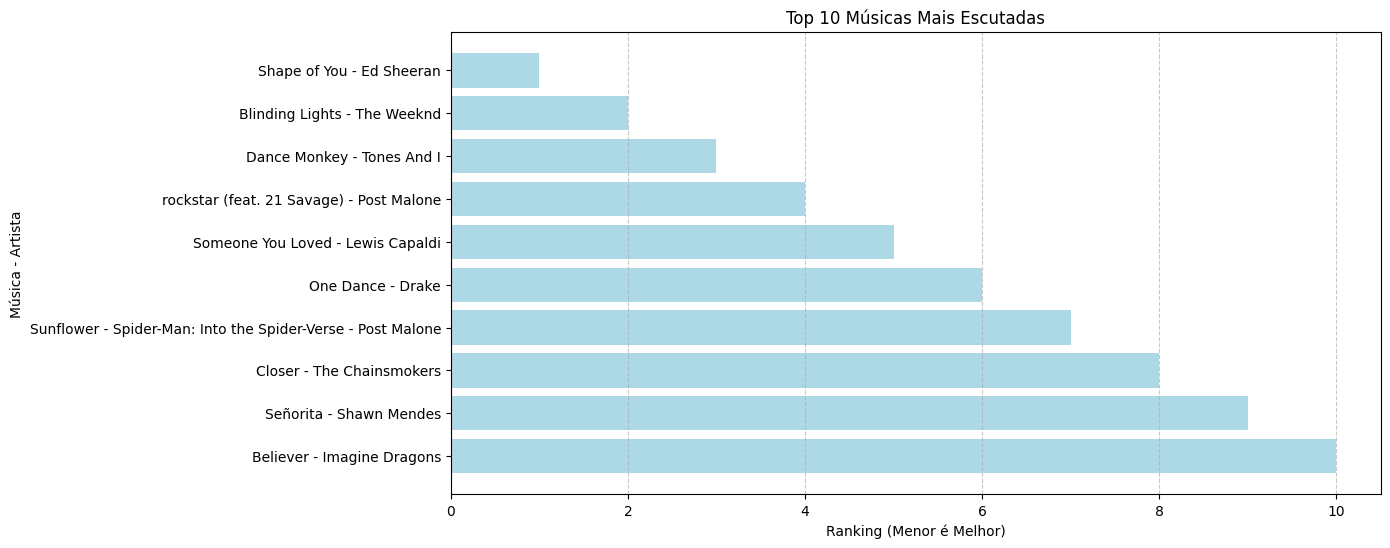

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(top_songs['Label'], top_songs['rank'], color='lightblue')
plt.title('Top 10 Músicas Mais Escutadas')
plt.xlabel('Ranking (Menor é Melhor)')
plt.ylabel('Música - Artista')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

ARTISTAS QUE MAIS TIVERAM MÚSICAS NO TOP 100.

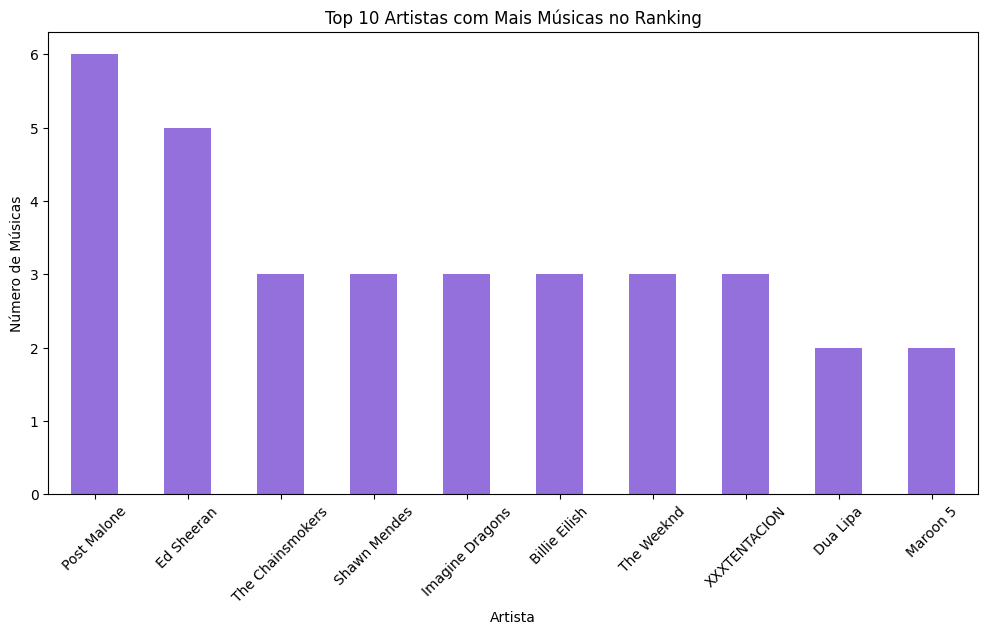

In [ ]:
top_artists = spotify['artist'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='mediumpurple')
plt.title('Top 10 Artistas com Mais Músicas no Ranking')
plt.xlabel('Artista')
plt.ylabel('Número de Músicas')
plt.xticks(rotation=45)
plt.show()


PODEMOS TIRAR UM INSIGHTS DOS GRÁFICOS ANTERIORES QUE OS MAIS ESCUTADOS FOI DO GÊNERO POP.

MÍSICAS EXPLÍCITAS x NÃO EXPLÍCITAS

SENDO:
* 1- EXPLÍCITA
* 0- NÃO EXPLÍCITA


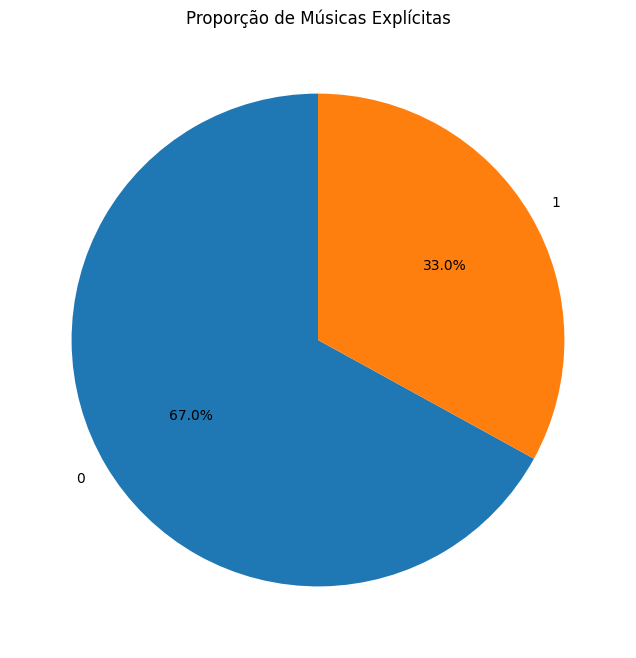

In [ ]:
plt.figure(figsize=(8, 8))
spotify['explicit'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Músicas Explícitas')
plt.ylabel('')
plt.show()


IMPORTANTE TER CONTROLE DO EXPLICITO OU NÃO, POIS TEMOS OUVINTES MENORES DE IDADE, DESSA FORMA PODEMOS TOMAR MEDIDAS PREVENTIVAS.

TOP 10 GÊNEROS DE MÚSICAS MAIS ESCUTADOS.

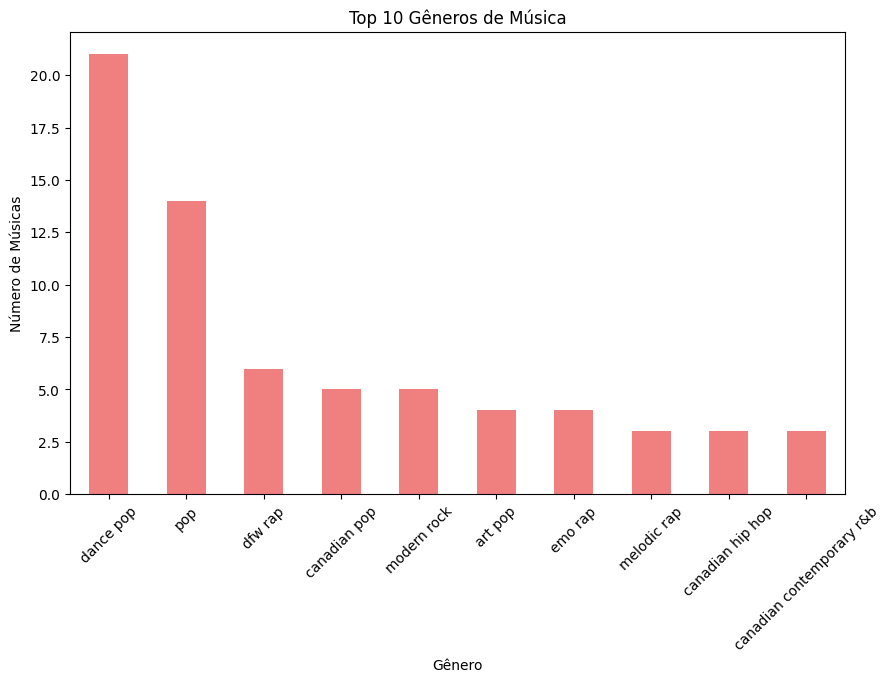

In [ ]:
# Contar os gêneros e selecionar os 10 mais comuns
genre_counts = spotify['top genre'].value_counts().head(10)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Gêneros de Música')
plt.xlabel('Gênero')
plt.ylabel('Número de Músicas')
plt.xticks(rotation=45)
plt.show()


DURAÇÕES MÉDIAS DAS MÚSICAS POR GÊNERO



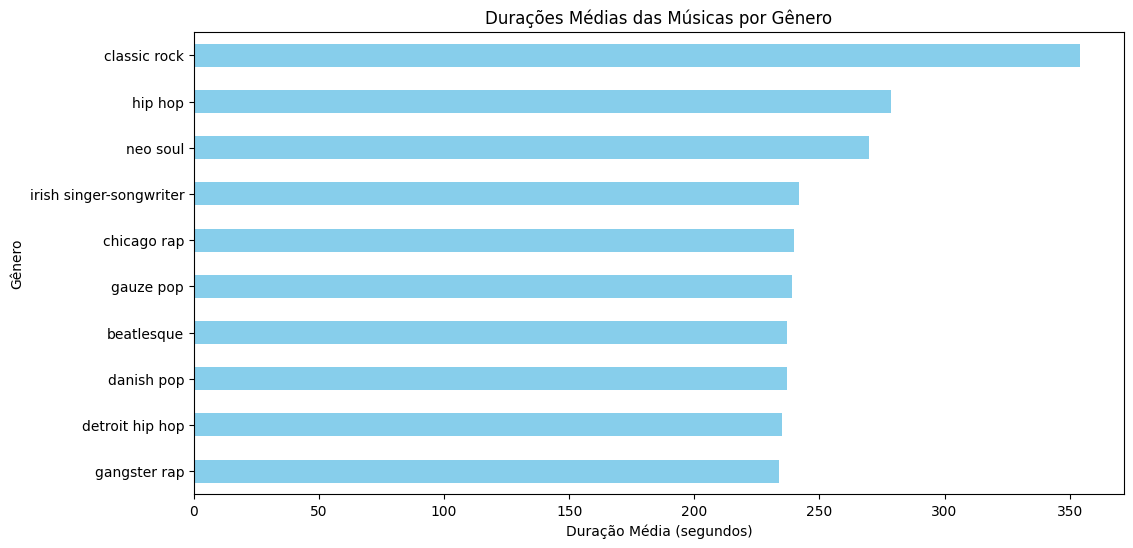

In [ ]:
avg_duration_per_genre = spotify.groupby('top genre')['dur'].mean().sort_values()
top_10_avg_duration = avg_duration_per_genre.tail(10)

plt.figure(figsize=(12, 6))
top_10_avg_duration.plot(kind='barh', color='skyblue')
plt.title('Durações Médias das Músicas por Gênero')
plt.xlabel('Duração Média (segundos)')
plt.ylabel('Gênero')
plt.show()


APLICAÇÃO DE MODELOS

Foi feito um cluster de música com agrupamento de músicas que compartilham características semelhantes, com base em dados.

In [ ]:
X = spotify[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

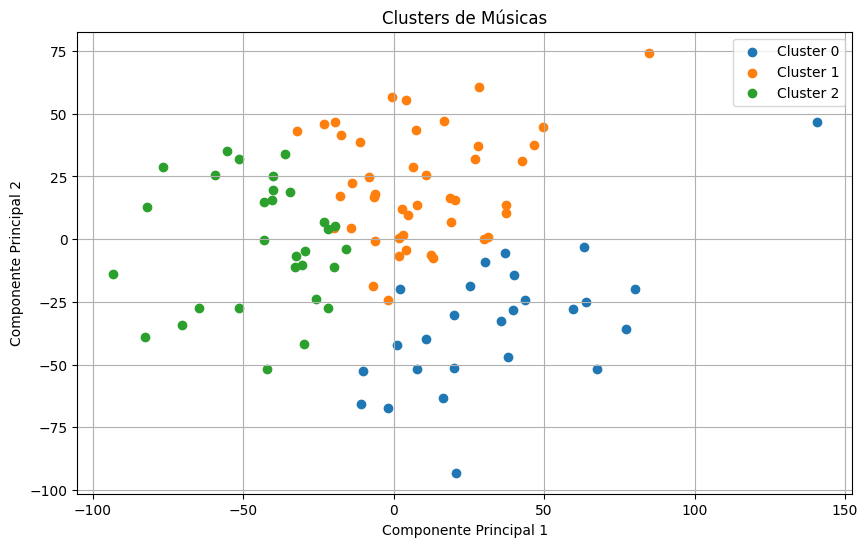

In [ ]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

spotify['cluster'] = clusters

plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(X_reduced[spotify['cluster'] == cluster, 0],
                X_reduced[spotify['cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.title('Clusters de Músicas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid()
plt.show()

Embora seja a união das músicas mais escutadas de abril de 2022 e seja de gêneros variados, podemos observar que os pontos dentro do cluster estão perto um dos outros, logo, conclui-se que essas músicas são muito semelhantes entre si, independente do gênero a qual pertencem.

# CONCLUSÃO:
*  Ao transformarmos nossas análises de dados em representações gráficas, facilitamos a comunicação com gestores e stakeholders. Os gráficos tornam a informação mais acessível a todos os públicos, independentemente de terem ou não uma formação técnica em dados. Isso não só melhora a compreensão geral, mas também promove discussões mais ricas, possibilitando a identificação de novos insights e a implementação de melhorias no projeto em andamento. A visualização de dados torna-se, assim, uma ferramenta estratégica para a tomada de decisões mais informadas e colaborativas


Conforme dados recebidos do LinkedIn, o próprio Spotify afirma que sua retrospectiva anual agregou 30 milhões de usuários na plataforma.
